## Gojek Assignment Section 1: Data wrangling and Visualization

**Author: Nidhi Gupta**|
**Date Modified: 2023-08-07**

**Context**:
**Gojek’s aim is to increase daily transaction volumes (sum of total actual_gmv per day) in the next 6
months by 5X. Marketing team wants some preliminary data analysis to understand how to achieve this
objective.**
1. Perform any cleaning, exploratory analysis necessary to use the provided data for this analysis
(a few sentences/plots describing your approach will suffice). What fraction of the drivers deliver
only food orders on 2021-01-20?
2. Using the data that you had processed, perform an RFM analysis and create a dashboard
for the Marketing team to visualize key patterns in the data. Which customer cohorts should
the Marketing team prioritize first?
3. Hypothesize how Gojek might leverage the insights gained from the data to generate higher
transaction volumes.

**Importing dependencies**

In [460]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

**Preliminary Analysis**

In [487]:
gojek_df = pd.read_csv('gojek_assignment_data.csv')

#gojek_df['service_type'].unique()

In [488]:
gojek_df.head()

,Unnamed: 0,Unnamed: 0.1,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv
0,0,11200,GK-11-374598266,141,541174926.0,GO-SEND-WEB-SAMEDAY,2021-01-01 00:13:58.459312+00:00,NaN
1,1,11201,GK-11-374606875,141,541000942.0,GO-SEND-WEB-SAMEDAY,2021-01-01 01:32:17.520762+00:00,NaN
2,2,11202,GK-11-374607346,141,540626929.0,GO-SEND-WEB-SAMEDAY,2021-01-01 01:35:31.272257+00:00,NaN
3,3,11203,GK-11-374608743,141,541406737.0,GO-SEND-WEB-SAMEDAY,2021-01-01 01:44:46.034169+00:00,NaN
4,4,11204,GK-11-374620604,141,541781776.0,GO-SEND-WEB-SAMEDAY,2021-01-01 02:38:50.786383+00:00,NaN


In [489]:
gojek_df.shape

(4890941, 8)

In [490]:
gojek_df.dtypes

Unnamed: 0        int64
Unnamed: 0.1      int64
order_no         object
customer_id       int64
driver_id       float64
service_type     object
booking_time     object
actual_gmv      float64
dtype: object

In [491]:
for i in gojek_df.columns:
    print('No of unique values in',i,':',gojek_df[i].nunique() )

No of unique values in Unnamed: 0 : 993933
No of unique values in Unnamed: 0.1 : 4890941
No of unique values in order_no : 3912658
No of unique values in customer_id : 1737181
No of unique values in driver_id : 317022
No of unique values in service_type : 20
No of unique values in booking_time : 3905391
No of unique values in actual_gmv : 40382


We know we just have 2 **Unnamed** columns in df so we can either remove them while importing or drop it after import. In this case, we will be searching for **all Unnamed** columns after import and then drop them at once 

In [492]:
gojek_df.drop(gojek_df.loc[:,gojek_df.columns.str.match('Unnamed')], axis = 1, inplace = True)

In [493]:
gojek_df.head()

,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv
0,GK-11-374598266,141,541174926.0,GO-SEND-WEB-SAMEDAY,2021-01-01 00:13:58.459312+00:00,NaN
1,GK-11-374606875,141,541000942.0,GO-SEND-WEB-SAMEDAY,2021-01-01 01:32:17.520762+00:00,NaN
2,GK-11-374607346,141,540626929.0,GO-SEND-WEB-SAMEDAY,2021-01-01 01:35:31.272257+00:00,NaN
3,GK-11-374608743,141,541406737.0,GO-SEND-WEB-SAMEDAY,2021-01-01 01:44:46.034169+00:00,NaN
4,GK-11-374620604,141,541781776.0,GO-SEND-WEB-SAMEDAY,2021-01-01 02:38:50.786383+00:00,NaN


We will check for **Unique values** in all columns to check if they are valid or not 

In [494]:
gojek_df['order_no'].unique()

array(['GK-11-374598266', 'GK-11-374606875', 'GK-11-374607346', ...,
       'GK-11-384433724', 'GK-11-384433738', 'GK-11-384433745'],
      dtype=object)

We have distinct values of **order_no** in this column for each order placed but some rows have just numeric order_no while others have alphanumeric data type. We will explore this more

In [495]:
gojek_df['customer_id'].unique()

array([      141, 697507413, 626139468, ..., 557487205, 550877189,
       582290510], dtype=int64)

We have distinct values of **customer_id** but column has **int64** data type instead **object** so we will be changing that.

In [496]:
gojek_df["customer_id"]=gojek_df["customer_id"].astype(str)
gojek_df["customer_id"].dtype

dtype('O')

In [497]:
gojek_df['driver_id'].unique()

array([5.41174926e+08, 5.41000942e+08, 5.40626929e+08, ...,
       5.40624110e+08, 5.41871170e+08, 5.41801509e+08])

In [498]:
gojek_df['driver_id'].value_counts()

0.0            706886
700402028.0       300
541055923.0       287
700405918.0       284
700439533.0       280
                ...  
541133150.0         1
700479667.0         1
700498039.0         1
541558134.0         1
700813752.0         1
Name: driver_id, Length: 317022, dtype: int64

We have **huge** chunks of drivers with **driver_id** in **"0.0 "**. This doesn't look good and these drivers might be the ones with **Null** driver_id. We will be exploring that more. We have driver_id in **float64** instead of **object** dtype which we will change now. 

In [499]:
# gojek_df["driver_id"]=gojek_df["driver_id"].astype(int) #import was done in float so converting in int first to remove 0s
# gojek_df["driver_id"] = gojek_df["driver_id"].astype(str) #then to object
# gojek_df["driver_id"].dtype

# Error : IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

We got above error because we have some **driver_id** with Null values. Before, we convert data type in **driver_id**, let's check the null values overall in df

### Dealing with Null values..

In [500]:
gojek_df.isnull().sum()

order_no              0
customer_id           0
driver_id        564813
service_type          0
booking_time          0
actual_gmv      2867526
dtype: int64

In [501]:
gojek_df.shape

(4890941, 6)

Driver_id has almost **564813** (11% of total df) values which are **Null**. Let's explore if these are valid or not. Everything except **actual_gmv** rows look okay which has Nulls as well. We will be treating them as well but for now let's impute Null driver_id with a dummy value of **999999999**

In [502]:
gojek_df.loc[gojek_df['driver_id'].isnull()].head(5)

,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv
788,GK-21-297626211,693882839,NaN,GO-BOX,2020-12-31 17:49:52.404465+00:00,NaN
793,GK-21-297626216,639293529,NaN,GO-BOX,2020-12-31 18:15:02.137301+00:00,NaN
799,GK-21-297626222,542678695,NaN,GO-BOX,2020-12-31 19:28:34.781190+00:00,NaN
801,GK-21-297626224,542678695,NaN,GO-BOX,2020-12-31 19:35:10.463671+00:00,NaN
804,GK-21-297626227,542678695,NaN,GO-BOX,2020-12-31 19:44:00.358170+00:00,NaN


In [503]:
gojek_df['driver_id'].fillna('999999999', inplace = True)
gojek_df['driver_id'].isnull().sum()

0

In [504]:
gojek_df["driver_id"]=gojek_df["driver_id"].astype(int) #import was done in float so converting in int first to remove 0s
gojek_df["driver_id"] = gojek_df["driver_id"].astype(str) #then to object
gojek_df["driver_id"].dtype

dtype('O')

Let's check for **actual_gmv**

In [505]:
gojek_df['actual_gmv'].isnull().sum()

2867526

In [506]:
gojek_df['actual_gmv'].isnull().sum()/len(gojek_df)*100

58.62933124729985

Almost **58%** of our **actual_gmv** is missing and it is one of the most important parameter to segment the customer and determine how the trasaction volume can be multiplied by 5x so we will be removing these rows to correctly determine our customer segments

In [512]:
gojek_df.dropna(inplace = True)

In [513]:
gojek_df['actual_gmv'].isnull().sum()

0

In [515]:
gojek_df['service_type'].unique()

array(['GO-TIX', 'GO-MART', 'GO-FOOD-PICKUP', 'GO-BILLS', 'GO-SHOP',
       'GO-PULSA', 'GO-FOOD'], dtype=object)

We have **7** different **service_type** offered by **Gojek** and all services look valid.

To make our analysis easier, we will be dealing with "GO-FOOD" and "GO-FOOD-PICKUP" separately. But please not that **GO-FOOD** and **GO-FOOD-PICKUP** are similar since **GO-FOOD-PICKUP** is a feature that is offered by Gojek under **GO-FOOD** platform itself. 

<a href="https://www.gojek.com/en-id/help/gofood/cara-pakai-fitur-pickup-di-gofood/">Checkout Company's Announcement</a><br>

<a href="https://www.gojek.io/blog/introducing-gofood-pickup">News article</a>

In [516]:
gojek_df['booking_time'].value_counts()

2021-01-13 01:02:06.825000+00:00    15
2021-01-30 11:14:44+00:00           15
2021-01-17 04:00:11.851000+00:00    15
2021-01-31 13:50:44+00:00           15
2021-01-30 04:53:46+00:00           15
                                    ..
2021-01-09 00:18:38.044287+00:00     1
2021-01-09 00:18:37.802485+00:00     1
2021-01-09 00:18:37.600194+00:00     1
2021-01-09 00:18:37.320212+00:00     1
2021-01-31 00:28:33.472925+00:00     1
Name: booking_time, Length: 1616653, dtype: int64

We have distinct booking time for orders but the data type is  **int64** instead of **datetime** dtype. We will change it now.

In [517]:
gojek_df['booking_time'] = pd.to_datetime(gojek_df['booking_time'])
gojek_df['booking_time'].head(2)

32   2021-01-01 00:02:22+00:00
33   2021-01-01 00:08:08+00:00
Name: booking_time, dtype: datetime64[ns, UTC]

### Dealing with 0s and Data types..

Unfortunately, the biggest part of any data analysis project is making sure that data is formatted and fixing it when it is not.The first part of this process is **Missing Data** that we dealt with above.

**Missing Data** is simply a blank space, or a surrogate value like **NA** or **0** that indicates that we failed to collect data for one of the features. For example, if we forgot to ask someone's age, or forgot to write it down then we would have blank space for that person's age.

In [518]:
gojek_df.isnull().sum()

order_no        0
customer_id     0
driver_id       0
service_type    0
booking_time    0
actual_gmv      0
dtype: int64

We can see that there are no **blank values** since we already dealt with that in "Dealing Missing data" but there might be some **0s** instead of blanks in some columns so we will be exploring that next. 

In [519]:
gojek_df.dtypes

order_no                     object
customer_id                  object
driver_id                    object
service_type                 object
booking_time    datetime64[ns, UTC]
actual_gmv                  float64
dtype: object

Let's check **actual_gmv** column..

In [520]:
gojek_df['actual_gmv'].value_counts()

0.0          123913
21500.0       77806
51500.0       56364
15356.0       56047
101500.0      36259
              ...  
1553067.0         1
3981013.0         1
143628.0          1
442681.0          1
41675.0           1
Name: actual_gmv, Length: 40382, dtype: int64

In [521]:
gojek_df['actual_gmv'].shape

(2023415,)

We have about **123913** values of **0s** in **actual_gmv** column out of total **4890941** values **(2.5% of total)**. We can think about customers who might get First time sign up offers/discounts but they would still need to pay some amount for shipping/delivery/VAT,etc. so this **actual_gmv** amount should always be **>0**. 

In [522]:
#examples of few orders with actual_gmv = 0
order_count =gojek_df[gojek_df['actual_gmv'] == 0].groupby(by = 'order_no')['order_no'].count()
order_count

order_no
115718001-122412-GOBILLS     1
115985538-743064-GOBILLS     1
116005680-829856-GOBILLS    11
116116541-028974-GOBILLS     1
116119534-100415-GOBILLS     1
                            ..
SH-952757774                 4
SH-952757775                 4
SH-952757781                 1
SH-952757784                 1
SH-952757786                 1
Name: order_no, Length: 98758, dtype: int64

In [523]:
order_count[order_count == 1]

order_no
115718001-122412-GOBILLS    1
115985538-743064-GOBILLS    1
116116541-028974-GOBILLS    1
116119534-100415-GOBILLS    1
116120560-678151-GOBILLS    1
                           ..
SH-952757743                1
SH-952757746                1
SH-952757781                1
SH-952757784                1
SH-952757786                1
Name: order_no, Length: 92725, dtype: int64

In [524]:
#for instance
gojek_df[gojek_df['order_no'] == '115718001-122412-GOBILLS']

,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv
737275,115718001-122412-GOBILLS,564204387,0,GO-BILLS,2021-01-01 03:57:02.436000+00:00,0.0


While exploring **actual_gmv**, we also came across **duplicate entries** of **order_no** with no change in overall values

In [525]:
order_count[order_count > 1]

order_no
116005680-829856-GOBILLS    11
117014889-095176-GOBILLS     4
117723351-235071-GOBILLS     4
14676011                     4
14681770                     4
                            ..
SH-952757248                 4
SH-952757276                 4
SH-952757514                 4
SH-952757774                 4
SH-952757775                 4
Name: order_no, Length: 6033, dtype: int64

In [526]:
#for instance
gojek_df[gojek_df['order_no'] == 'MT-1416306769']

,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv
1251324,MT-1416306769,26002166,999999999,GO-MART,2021-01-08 04:56:42.589000+00:00,0.0
1755918,MT-1416306769,26002166,999999999,GO-MART,2021-01-08 04:56:42.589000+00:00,0.0
1793104,MT-1416306769,26002166,999999999,GO-MART,2021-01-08 04:56:42.589000+00:00,0.0
1830290,MT-1416306769,26002166,999999999,GO-MART,2021-01-08 04:56:42.589000+00:00,0.0
1855579,MT-1416306769,26002166,999999999,GO-MART,2021-01-08 04:56:42.589000+00:00,0.0
1862988,MT-1416306769,26002166,999999999,GO-MART,2021-01-08 04:56:42.589000+00:00,0.0
1870397,MT-1416306769,26002166,999999999,GO-MART,2021-01-08 04:56:42.589000+00:00,0.0
1877806,MT-1416306769,26002166,999999999,GO-MART,2021-01-08 04:56:42.589000+00:00,0.0
1885215,MT-1416306769,26002166,999999999,GO-MART,2021-01-08 04:56:42.589000+00:00,0.0
1892624,MT-1416306769,26002166,999999999,GO-MART,2021-01-08 04:56:42.589000+00:00,0.0


In [527]:
gojek_df[gojek_df['order_no'] == 'SH-952757248']

,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv
4391515,SH-952757248,570737302,700766245,GO-SHOP,2021-01-31 03:21:21.232517+00:00,0.0
4779198,SH-952757248,570737302,700766245,GO-SHOP,2021-01-31 03:21:21.232517+00:00,0.0
4802082,SH-952757248,570737302,700766245,GO-SHOP,2021-01-31 03:21:21.232517+00:00,0.0
4824966,SH-952757248,570737302,700766245,GO-SHOP,2021-01-31 03:21:21.232517+00:00,0.0


Since there is only **6%** rows with **actual_gmv == 0**, we will be dropping these rows. We could have imputed these with some statistical analysis like **Mean** if distribution is **Normal** but for that we would have to first remove duplicate **order_no** so that mean is not overvalued. Since it is only **6%**, we will be opting for dropping

In [529]:
len(gojek_df[gojek_df['actual_gmv'] == 0.0])/len(gojek_df)*100

6.123953810760521

In [530]:
gojek_df.drop(gojek_df[(gojek_df.actual_gmv == 0.0)].index, inplace = True)
len(gojek_df[gojek_df.actual_gmv == 0.0])
len(gojek_df)

1899502

Let's check **driver_id** column..

In [532]:
gojek_df['driver_id'].value_counts()

0            693803
999999999    351626
541018995       190
541655716       187
540540155       165
              ...  
541643864         1
541747120         1
540467778         1
700600337         1
700182268         1
Name: driver_id, Length: 167900, dtype: int64

In [533]:
gojek_df.shape

(1899502, 6)

We can see there are **693803** driver_id with **0s** out of total **1899502** values **(36% of total)**..Let's explore this a bit more..

In [534]:
order_count = gojek_df[gojek_df['driver_id'] == '0.0'].groupby(by = 'order_no')['order_no'].count()
order_count

Series([], Name: order_no, dtype: int64)

Before we deal with **driver_id == 0.0**, we can see some **order_no** have only ***Numeric datatype rows*** while others have ***Alphanumeric rows***. If we explore these numeric order_no rows, we can see these are only present where **driver_id == 0**

In [535]:
gojek_df[gojek_df['order_no'].astype(str).str.isdigit()]

,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv
32,14660200,697507413,0,GO-TIX,2021-01-01 00:02:22+00:00,90000.0
33,14660201,626139468,0,GO-TIX,2021-01-01 00:08:08+00:00,106000.0
34,14660202,608534918,0,GO-TIX,2021-01-01 00:08:18+00:00,125000.0
35,14660203,557745837,0,GO-TIX,2021-01-01 00:09:47+00:00,76000.0
36,14660204,553797113,0,GO-TIX,2021-01-01 00:09:59+00:00,86000.0
...,...,...,...,...,...,...
4889351,14687468,595594123,0,GO-TIX,2021-01-30 08:37:32+00:00,11000.0
4889810,14685438,544456384,0,GO-TIX,2021-01-29 19:24:04+00:00,212000.0
4890065,14685429,637980441,0,GO-TIX,2021-01-29 18:31:37+00:00,30000.0
4890362,14685955,546441419,0,GO-TIX,2021-01-30 03:05:25+00:00,95000.0


In [536]:
len(gojek_df[gojek_df['order_no'].astype(str).str.isdigit()])/len(gojek_df)*100

1.262646735828654

In [537]:
gojek_df[gojek_df['order_no'].astype(str).str.isdigit()]['driver_id'].unique()

array(['0'], dtype=object)

There are around  **1% of order_no (about 23984 values)** that are numeric and they all are mapped to **driver_id == 0** so these order_no ids will be dealt with (deleted or imputed) while we deal with driver_id. 

In [538]:
#for instance 
gojek_df[gojek_df['order_no'] == '118799553-650350-GOBILLS']

,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv
3471597,118799553-650350-GOBILLS,593963743,0,GO-BILLS,2021-01-23 01:10:59.590000+00:00,21500.0


In [539]:
#checking alphanumeric order_no
gojek_df[gojek_df['order_no'] == '116760576-939836-GOBILLS'] 

,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv
1726692,116760576-939836-GOBILLS,597331624,0,GO-BILLS,2021-01-08 05:16:23.572000+00:00,242832.0
1766014,116760576-939836-GOBILLS,597331624,0,GO-BILLS,2021-01-08 05:16:23.572000+00:00,242832.0
1803200,116760576-939836-GOBILLS,597331624,0,GO-BILLS,2021-01-08 05:16:23.572000+00:00,242832.0
1840386,116760576-939836-GOBILLS,597331624,0,GO-BILLS,2021-01-08 05:16:23.572000+00:00,242832.0
1855450,116760576-939836-GOBILLS,597331624,0,GO-BILLS,2021-01-08 05:16:23.572000+00:00,242832.0
1862859,116760576-939836-GOBILLS,597331624,0,GO-BILLS,2021-01-08 05:16:23.572000+00:00,242832.0
1870268,116760576-939836-GOBILLS,597331624,0,GO-BILLS,2021-01-08 05:16:23.572000+00:00,242832.0
1877677,116760576-939836-GOBILLS,597331624,0,GO-BILLS,2021-01-08 05:16:23.572000+00:00,242832.0
1885086,116760576-939836-GOBILLS,597331624,0,GO-BILLS,2021-01-08 05:16:23.572000+00:00,242832.0
1892495,116760576-939836-GOBILLS,597331624,0,GO-BILLS,2021-01-08 05:16:23.572000+00:00,242832.0


Since we have about **36%** of **driver_id** with **0** values **(693803 values)** we would be droppin them. We could have also opted to impute these most occuring **driver_id which is **999999999** but since we have already imputed missing values with this dummy variable, we can drop these driver_ids or else it would lead to bias toward dummy driver_id **999999999**

Note : We will be treating **duplicate orders** after missing values since we don't want to lose any insights on overall orders 

In [540]:
gojek_df.drop(gojek_df[gojek_df['driver_id'] == '0'].index, inplace = True)
len(gojek_df[gojek_df['driver_id'] == '0'])

0

In [541]:
len(gojek_df[gojek_df['order_no'].str.isdigit()])

0

By now, we have also dealt with **order_no** which were only **Numeric** and invalid. We only have alphanumeric values in **order_no** column now..

In [542]:
gojek_df.dtypes

order_no                     object
customer_id                  object
driver_id                    object
service_type                 object
booking_time    datetime64[ns, UTC]
actual_gmv                  float64
dtype: object

### Dealing with Duplicates..

In [543]:
gojek_df.head(2)


,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv
12379,MT-8170880142,550269611,700155132,GO-MART,2021-01-04 00:02:19.712000+00:00,81000.0
12380,MT-6936803087,612297808,700416843,GO-MART,2021-01-04 00:07:00.655000+00:00,197600.0


In [544]:
gojek_df.duplicated().sum()

240686

We can see we have about **240686 duplicates across df** but this is not a valid conclusion. There are certain columns like **service_type** where duplicates would be present for each market_type but some columns like **order_no** where duplicates should not be present. Let's explore this in detail. 

Let's check for **order_no**..

In [545]:
gojek_df[gojek_df['order_no'].duplicated()].sort_values(by = 'order_no')

,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv
811967,F-1083257466,556982834,999999999,GO-FOOD,2020-12-31 17:00:05.429104+00:00,135000.0
851625,F-1083257466,556982834,999999999,GO-FOOD,2020-12-31 17:00:05.429104+00:00,135000.0
891283,F-1083257466,556982834,999999999,GO-FOOD,2020-12-31 17:00:05.429104+00:00,135000.0
969511,F-1083257490,546610727,540208280,GO-FOOD,2020-12-31 17:00:17.542392+00:00,49000.0
985563,F-1083257490,546610727,540208280,GO-FOOD,2020-12-31 17:00:17.542392+00:00,49000.0
...,...,...,...,...,...,...
4777939,SH-952757684,676234255,700628705,GO-SHOP,2021-01-31 03:29:10.577806+00:00,223000.0
4800823,SH-952757684,676234255,700628705,GO-SHOP,2021-01-31 03:29:10.577806+00:00,223000.0
4799209,SH-952757770,671542936,700736471,GO-SHOP,2021-01-31 03:30:43.936504+00:00,93000.0
4844977,SH-952757770,671542936,700736471,GO-SHOP,2021-01-31 03:30:43.936504+00:00,93000.0


In [546]:
#picking up one example
gojek_df[gojek_df['order_no'] == 'F-1083257466']

,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv
703643,F-1083257466,556982834,999999999,GO-FOOD,2020-12-31 17:00:05.429104+00:00,135000.0
811967,F-1083257466,556982834,999999999,GO-FOOD,2020-12-31 17:00:05.429104+00:00,135000.0
851625,F-1083257466,556982834,999999999,GO-FOOD,2020-12-31 17:00:05.429104+00:00,135000.0
891283,F-1083257466,556982834,999999999,GO-FOOD,2020-12-31 17:00:05.429104+00:00,135000.0


In [547]:
#picking up another example
gojek_df[gojek_df['order_no'] == 'SH-952757684']

,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv
4391951,SH-952757684,676234255,700628705,GO-SHOP,2021-01-31 03:29:10.577806+00:00,223000.0
4777939,SH-952757684,676234255,700628705,GO-SHOP,2021-01-31 03:29:10.577806+00:00,223000.0
4800823,SH-952757684,676234255,700628705,GO-SHOP,2021-01-31 03:29:10.577806+00:00,223000.0
4823707,SH-952757684,676234255,700628705,GO-SHOP,2021-01-31 03:29:10.577806+00:00,223000.0


We can try this with multiple order_no but in all scenarios we can see nothing is changig except Index in all rows i.e. these rows are pure duplicates so we will be dealing with these duplicated order_no to **avoid overvaluation of our actual_gmv.**

In [548]:
gojek_df.drop_duplicates(inplace = True)

In [549]:
gojek_df['order_no'].duplicated().sum()

0

In [550]:
gojek_df[gojek_df['order_no'] == 'SH-952757684']

,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv
4391951,SH-952757684,676234255,700628705,GO-SHOP,2021-01-31 03:29:10.577806+00:00,223000.0


Let's check for **customer_id**..

In [551]:
gojek_df['customer_id'].duplicated().sum()

433179

In [552]:
gojek_df[gojek_df['customer_id'].duplicated()].sort_values(by = 'customer_id')

,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv
4445759,MT-8037937803,10219706,700779572,GO-MART,2021-01-29 06:29:03.125000+00:00,195800.0
1004004,MT-3698929720,10219706,700745610,GO-MART,2021-01-11 05:04:38.831000+00:00,189200.0
2852122,MT-1184739824,10219706,700388997,GO-MART,2021-01-23 09:22:51.372000+00:00,194800.0
3791795,MT-7985492156,10219706,541040122,GO-MART,2021-01-26 08:43:52.958000+00:00,179900.0
3968924,SH-952533617,10219721,540796789,GO-SHOP,2021-01-27 01:16:19.582220+00:00,90000.0
...,...,...,...,...,...,...
3829046,FP-2123383,9467584,999999999,GO-FOOD-PICKUP,2021-01-25 08:21:34.305000+00:00,44176.0
3311798,FP-2032981,9467584,999999999,GO-FOOD-PICKUP,2021-01-20 06:09:31.538000+00:00,21000.0
2995591,FP-2075641,9467584,999999999,GO-FOOD-PICKUP,2021-01-23 05:47:41.478000+00:00,21000.0
4083449,FP-2147830,9467584,999999999,GO-FOOD-PICKUP,2021-01-27 06:01:01.188000+00:00,21000.0


In [553]:
gojek_df[gojek_df['customer_id'] == '10219706']

,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv
431454,MT-7519342533,10219706,700356777,GO-MART,2021-01-01 03:58:47.626000+00:00,189300.0
1004004,MT-3698929720,10219706,700745610,GO-MART,2021-01-11 05:04:38.831000+00:00,189200.0
2852122,MT-1184739824,10219706,700388997,GO-MART,2021-01-23 09:22:51.372000+00:00,194800.0
3791795,MT-7985492156,10219706,541040122,GO-MART,2021-01-26 08:43:52.958000+00:00,179900.0
4445759,MT-8037937803,10219706,700779572,GO-MART,2021-01-29 06:29:03.125000+00:00,195800.0


Duplicates in customer_id is **valid** since one customer can order multiple orders with different **order_no** so we will leave it as it is.

Let's check for **driver_id**..

In [554]:
gojek_df['driver_id'].duplicated().sum()

797114

In [555]:
gojek_df[gojek_df['driver_id'].duplicated()].sort_values(by = 'driver_id')

,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv
4671187,F-1114898950,545263928,100001,GO-FOOD,2021-01-30 00:11:30.455248+00:00,46250.0
2417157,F-1100271408,572220252,100001,GO-FOOD,2021-01-16 00:03:55.769660+00:00,9000.0
4024731,F-1110706219,546361011,100001,GO-FOOD,2021-01-26 00:27:13.140220+00:00,27000.0
3512668,F-1107525526,623291130,100001,GO-FOOD,2021-01-23 00:07:14.190666+00:00,25000.0
4757582,F-1116037931,550110570,100001,GO-FOOD,2021-01-31 00:03:44.266517+00:00,21000.0
...,...,...,...,...,...,...
1096099,FP-1773562,559251020,999999999,GO-FOOD-PICKUP,2021-01-07 07:52:04.431000+00:00,53000.0
1096100,FP-1773563,542845911,999999999,GO-FOOD-PICKUP,2021-01-07 07:52:06.855000+00:00,52000.0
1096101,FP-1773564,542845911,999999999,GO-FOOD-PICKUP,2021-01-07 07:52:09.862000+00:00,52000.0
1096093,FP-1773556,552554347,999999999,GO-FOOD-PICKUP,2021-01-07 07:51:58.596000+00:00,101000.0


In [556]:
gojek_df[gojek_df['driver_id'] == '100001'].head(4)

,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv
697762,F-1084593687,552844879,100001,GO-FOOD,2021-01-02 00:13:50.699761+00:00,34000.0
759217,F-1085791035,599881677,100001,GO-FOOD,2021-01-03 00:24:57.767755+00:00,52000.0
1278185,MT-9622449246,563796140,100001,GO-MART,2021-01-07 06:38:14.640000+00:00,41600.0
1566554,F-1094931355,684018550,100001,GO-FOOD,2021-01-11 00:00:41.937310+00:00,42600.0


These are also **valid** since one driver can be part of multiple orders, customers and deliveries so we will leave it as is..

### Exploratory Data Analysis

Let us start with exploring our data set, to better understand the patterns in the data and potentially form some hypothesis about total transaction volumes. First we will look at the distribution of individual variables and then slice and dice our data for any interesting trends.

In [557]:
gojek_df.head()

,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv
12379,MT-8170880142,550269611,700155132,GO-MART,2021-01-04 00:02:19.712000+00:00,81000.0
12380,MT-6936803087,612297808,700416843,GO-MART,2021-01-04 00:07:00.655000+00:00,197600.0
12381,MT-1332902187,548716750,700874204,GO-MART,2021-01-04 00:07:36.506000+00:00,83500.0
12382,MT-2017144038,551190528,700129632,GO-MART,2021-01-04 00:08:20.490000+00:00,152200.0
12383,MT-5363306916,663185101,700780569,GO-MART,2021-01-04 00:09:03.470000+00:00,42500.0


**A. Checking distribution of each service_type**

In [558]:
for i in gojek_df.columns:
    print(i, gojek_df[i].nunique())

order_no 965013
customer_id 531834
driver_id 167899
service_type 4
booking_time 964800
actual_gmv 16831


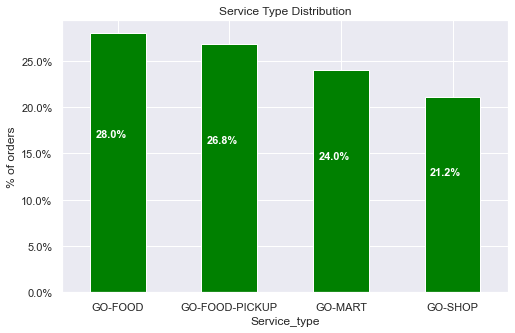

In [569]:
#service type distrubution

ax = plt.figure(figsize = (8,5))
ax = (gojek_df['service_type'].value_counts()/len(gojek_df['service_type'])*100).plot(kind = 'bar', stacked = True,
                                                                                     color = 'green', rot = 0)

ax.set_xlabel('Service_type')
ax.set_ylabel('% of orders')
ax.set_title('Service Type Distribution')
ax.yaxis.set_major_formatter(mtick.PercentFormatter()) #chnaging formatting of yaxis to %

for p in ax.patches: 
    width, height = p.get_width(),  p.get_height() # get_width pulls left or right; get_y pushes up or down
    x,y = p.get_xy()
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.10*width, p.get_y()+.60*height), #text coordinates
                color = 'white',
               weight = 'bold',
               size = 11)
    
sns.set_style('darkgrid')
sns.set()

Highest contributing services are **GoFood** which contributes to almost ***28%*** of all orders

Checking **Actual_gmv** as per each service type..

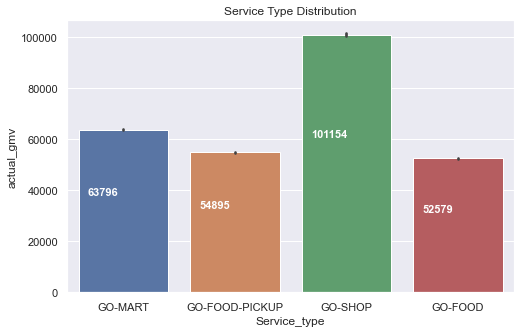

In [570]:
ax = plt.figure(figsize = (8,5))

ax = sns.barplot(x = gojek_df['service_type'], y =gojek_df['actual_gmv'])

ax.set_xlabel('Service_type')
ax.set_ylabel('actual_gmv')
ax.set_title('Service Type Distribution')

for p in ax.patches: 
    width, height = p.get_width(),  p.get_height() # get_width pulls left or right; get_y pushes up or down
    x,y = p.get_xy()
    ax.annotate('{:.0f}'.format(height), (p.get_x()+.10*width, p.get_y()+.60*height), #text coordinates
                color = 'white',
               weight = 'bold',
               size = 11)

sns.set_style('darkgrid')
sns.set()

In [633]:
len(gojek_df[gojek_df['service_type'] == 'GO-SHOP'])/len(gojek_df)*100

21.15391191621253

We can see as per **actual gmv**, highest service type is actually **GO-SHOP** and not **GO-FOOD**. Intrestingly, even though the highest number of orders are from *GO-FOOD*, it actually did not contribute so much to transaction amount.Let's re-confirm that here.

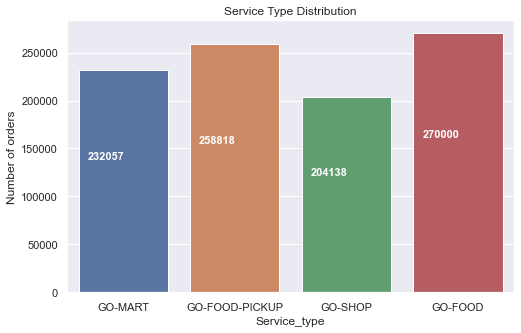

In [571]:
ax = plt.figure(figsize = (8,5))

ax = sns.countplot(x = gojek_df['service_type'])

ax.set_xlabel('Service_type')
ax.set_ylabel('Number of orders')
ax.set_title('Service Type Distribution')

for p in ax.patches: 
    width, height = p.get_width(),  p.get_height() # get_width pulls left or right; get_y pushes up or down
    x,y = p.get_xy()
    ax.annotate('{:.0f}'.format(height), (p.get_x()+.10*width, p.get_y()+.60*height), #text coordinates
                color = 'white',
               weight = 'bold',
               size = 11)

sns.set_style('darkgrid')
sns.set()

**B. Checking Booking timelines**

Text(0.5, 1.0, 'Orders by Booking date')

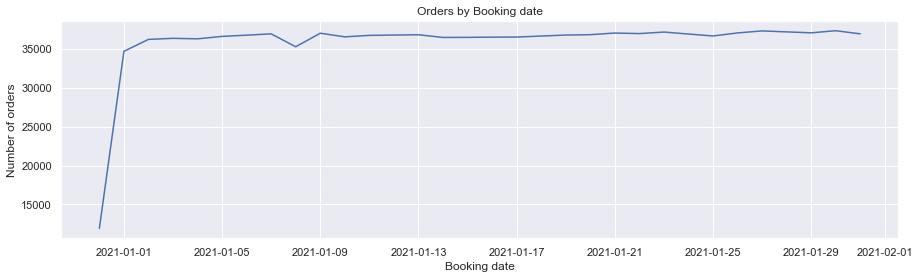

In [581]:
#Number of orders in this timeline
gojek_df['booking_date'] = gojek_df['booking_time'].dt.date
ax = plt.figure(figsize = (15,4))
grouped_orders = gojek_df.groupby(by = 'booking_date')['order_no'].count()
grouped_orders = grouped_orders.reset_index()
ax = sns.lineplot(x = grouped_orders['booking_date'],y =  grouped_orders['order_no'])
ax.set_xlabel('Booking date')
ax.set_ylabel('Number of orders')
ax.set_title('Orders by Booking date')

We are not getting any huge bump in number of orders on any specific date in month of January'21. (we only have data for 1 month in January). We can confirm this with **booking_time** as well 

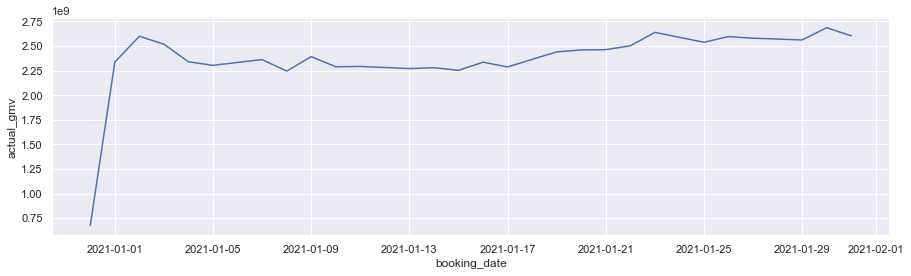

In [580]:
#actual gmv in this timeline
ax = plt.figure(figsize = (15,4))
grouped_orders = gojek_df.groupby(by = 'booking_date')['actual_gmv'].sum()
grouped_orders = grouped_orders.reset_index()
ax = sns.lineplot(x = grouped_orders['booking_date'],y =  grouped_orders['actual_gmv'])

No such chnage in **actual_gmv** across dates as well..

C.Checking **actual_gmv** and how it changes according to different variables..

In [582]:
gojek_df.head(2)

,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv,booking_date
12379,MT-8170880142,550269611,700155132,GO-MART,2021-01-04 00:02:19.712000+00:00,81000.0,2021-01-04
12380,MT-6936803087,612297808,700416843,GO-MART,2021-01-04 00:07:00.655000+00:00,197600.0,2021-01-04


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Transaction amount distribution')

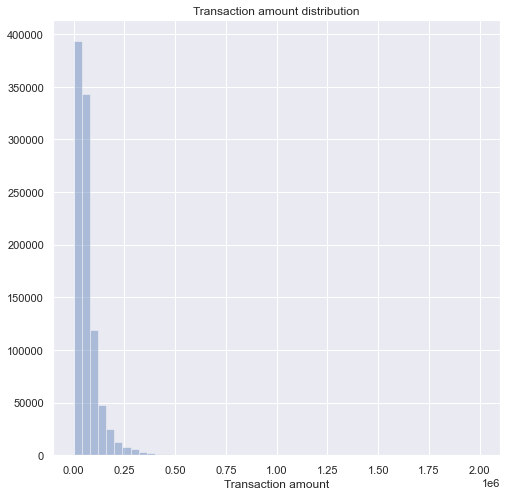

In [583]:
#average transaction amount per order
fig = plt.figure(figsize= (8,8))
ax = sns.distplot(gojek_df['actual_gmv'], hist = True,kde = False, )
ax.set_xlabel('Transaction amount')
ax.set_title('Transaction amount distribution')

Most of our **actual_gmv** lies in the region of **30k-40k** amount which gives us an idea that most of our transactions are around this amount per order. 

Text(0.5, 1.0, 'Low contributing customers')

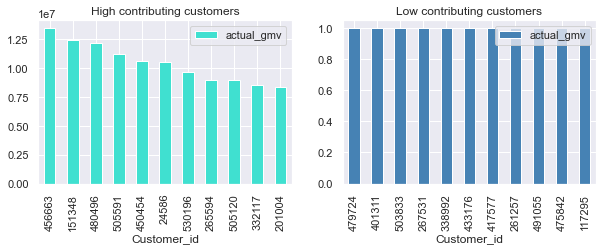

In [584]:
#customers who contributed to highest actual_gmv
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (
    10,3))
#top 10 customers
highest_transaction_amount_customers = gojek_df.groupby(by = 'customer_id').sum()['actual_gmv']
highest_transaction_amount_customers = highest_transaction_amount_customers.reset_index().sort_values(by = 'actual_gmv',ascending = False)
ax = highest_transaction_amount_customers.iloc[:11,].plot(kind = 'bar', ax = axes[0], color = 'turquoise')
ax.set_xlabel('Customer_id')
ax.set_title('High contributing customers')
#lowest 10 customers
lowest_transaction_amount_customers = gojek_df.groupby(by = 'customer_id').sum()['actual_gmv']
lowest_transaction_amount_customers = lowest_transaction_amount_customers.reset_index().sort_values(by = 'actual_gmv',ascending = True)
ax = lowest_transaction_amount_customers.iloc[:11,].plot(kind = 'bar', ax = axes[1], color = 'steelblue')
ax.set_xlabel('Customer_id')
ax.set_title('Low contributing customers')

Top 10 Customers who have highly contributed to **actual_gmv** are in range of **12500000+** and lowest contribution is as less as **1.0**

Similarly, we can Highest contributing orders and drivers..

Text(0.5, 1.0, 'Low contributing orders')

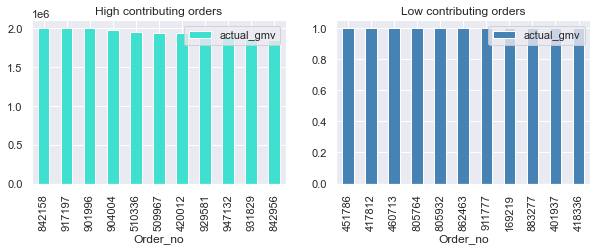

In [585]:
#orders which contributed to highest actual_gmv
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (
    10,3))
#top 10 orders
highest_transaction_amount_orders = gojek_df.groupby(by = 'order_no').sum()['actual_gmv']
highest_transaction_amount_orders = highest_transaction_amount_orders.reset_index().sort_values(by = 'actual_gmv',ascending = False)
ax = highest_transaction_amount_orders.iloc[:11,].plot(kind = 'bar', ax = axes[0], color = 'turquoise')
ax.set_xlabel('Order_no')
ax.set_title('High contributing orders')
#lowest 10 orders
lowest_transaction_amount_orders = gojek_df.groupby(by = 'order_no').sum()['actual_gmv']
lowest_transaction_amount_orders = lowest_transaction_amount_orders.reset_index().sort_values(by = 'actual_gmv',ascending = True)
ax = lowest_transaction_amount_orders.iloc[:11,].plot(kind = 'bar', ax = axes[1], color = 'steelblue')
ax.set_xlabel('Order_no')
ax.set_title('Low contributing orders')

Let's analyse this further using **RFM Analysis...**

In [586]:
max(gojek_df['booking_date'])

datetime.date(2021, 1, 31)

In [587]:
# recency

day = '2021-02-01' #1st date of next month
day = pd.to_datetime(day)
gojek_df['booking_date'] = pd.to_datetime(gojek_df['booking_date'])

recency = gojek_df.groupby('customer_id').agg({'booking_date': lambda x : ((day-x.max()).days)})

# frequency 

# # gojek_df.groupby(['customer_id', 'order_no']).count()
# # we have 1:1 mapping with customer_id and order_no #if we had item_no detail
# # we would have one to many mapping b/w customer_id and order_no
# #but still we would only take distinct count orders by each customer to be safe 

frequency = gojek_df.drop_duplicates('order_no').groupby('customer_id')['order_no'].count()

# monetary

monetary = gojek_df.groupby('customer_id')['actual_gmv'].sum()
rfm = pd.concat([recency, frequency, monetary], axis = 1)
rfm.rename(columns = {'booking_date' : 'recency','order_no' : 'frequency', 'actual_gmv': 'monetary'},inplace = True )
# print(rfm.shape)

In [588]:
rfm.head(5)

,recency,frequency,monetary
customer_id,,,
10089127,13,1,130000.0
10219706,3,5,949000.0
10219721,1,4,360000.0
10219739,6,2,106000.0
10219741,16,1,23000.0


### Customer segmentation using Clustering

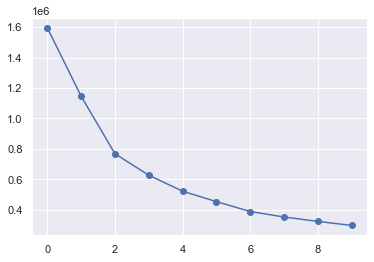

In [589]:
from sklearn.preprocessing import StandardScaler #we will be using standard scalar to scale our data 
from sklearn.cluster import KMeans #kmeans to cluster it into groups

scaler = StandardScaler()
scaled = scaler.fit_transform(rfm)

inertia = []  #to find the best number of clusters based on sum of squared distances
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)
    
plt.plot(inertia, marker = 'o')

As per elbow method, optimum number of clusters are **3** so let's divide our customers in 3 different segmentations..

In [590]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled)
rfm['clusters'] = kmeans.labels_ + 1

In [591]:
rfm.head()

,recency,frequency,monetary,clusters
customer_id,,,,
10089127,13,1,130000.0,3
10219706,3,5,949000.0,2
10219721,1,4,360000.0,3
10219739,6,2,106000.0,3
10219741,16,1,23000.0,1


In [592]:
rfm.groupby('clusters')[['recency', 'frequency', 'monetary']].mean()

,recency,frequency,monetary
clusters,,,
1,23.474590,1.280990,76273.990945
2,6.268659,7.888238,685480.966623
3,7.202089,1.763025,109826.056551


In [621]:
rfm['monetary'].mean()

120070.7659777299

In [604]:
#providing approproiate segment names 

def func(row):
    if row['clusters'] == 2:
        return 'Whales Cx'
    elif row['clusters'] ==3 :
        return 'Average Cx'
    else :
        return 'Lapsed Cx'

In [606]:
gojek_df[gojek_df['customer_id'] == '2']['actual_gmv'].value_counts()

Series([], Name: actual_gmv, dtype: int64)

In [607]:
rfm['Conditions'] = rfm.apply(func, axis = 1)
rfm.head()

,recency,frequency,monetary,clusters,Conditions
customer_id,,,,,
10089127,13,1,130000.0,3,Average Cx
10219706,3,5,949000.0,2,Whales Cx
10219721,1,4,360000.0,3,Average Cx
10219739,6,2,106000.0,3,Average Cx
10219741,16,1,23000.0,1,Lapsed Cx


In [615]:
rfm['frequency'].unique()

array([  1,   5,   4,   2,   3,   7,  17,  10,   6,   9,  12,   8,  11,
        14,  24,  13,  15,  16,  18,  21,  25,  20,  19,  29,  23,  22,
        37,  40,  45,  26,  34,  28,  36,  46,  31,  27,  30,  61,  52,
        39,  32, 537,  35,  55,  33,  47,  56, 117,  44,  43,  75, 102,
       491,  38, 104,  50,  59,  68, 149,  48, 124, 135,  78,  49,  42,
       220,  41], dtype=int64)

In [608]:
rfm['recency'].unique()

array([13,  3,  1,  6, 16,  2, 15, 28, 21, 19, 22,  7, 25, 12, 17, 27, 10,
       24,  9, 31, 18, 23, 11, 30, 29,  5, 32], dtype=int64)

In [622]:
rfm['monetary'].mean()

120070.7659777299

In [610]:
rfm['Conditions'].value_counts()

Average Cx    263374
Lapsed Cx     244731
Whales Cx      23729
Name: Conditions, dtype: int64

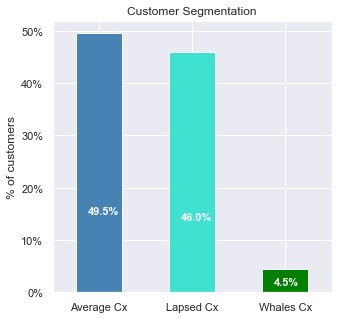

In [611]:
#service type distrubution
colors = ['steelblue', 'turquoise', 'green']
ax = plt.figure(figsize = (5,5))
ax = (rfm['Conditions'].value_counts()/len(rfm['Conditions'])*100).plot(kind = 'bar', stacked = True,
                                                                                     color = colors, rot = 0)

ax.set_ylabel('% of customers')
ax.set_title('Customer Segmentation')
ax.yaxis.set_major_formatter(mtick.PercentFormatter()) #chnaging formatting of yaxis to %

for p in ax.patches: 
    width, height = p.get_width(),  p.get_height() # get_width pulls left or right; get_y pushes up or down
    x,y = p.get_xy()
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.30*height), #text coordinates
                color = 'white',
               weight = 'bold',
               size = 11)
    
sns.set_style('darkgrid')
sns.set()

**Questions:**

**1. Perform any cleaning, exploratory analysis necessary to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the drivers deliver only food orders on 2021-01-20?**

EDA  - Check above^ 

In [612]:
len(gojek_df[gojek_df['booking_date'] == '2021-01-20'])/len(gojek_df)*100

3.818083279707113

**2. Using the data that you had processed, perform an RFM analysis and create a dashboard
for the Marketing team to visualize key patterns in the data. Which customer cohorts should
the Marketing team prioritize first?**

In [614]:
rfm.to_csv('rfm_analysis_final.csv')
print(rfm.shape)
print(gojek_df.shape)

(531834, 5)
(965013, 7)


Distinct customers in **rfm** is 531834 while **total customer_id** are 965013. Since rfm is aggregated to customer level based on their recency, purchase and monetary value,we will be preparing a dashboard to see how these factors look like in each clsuter using Tableau.

**Dashboard and RFM recommendations: (Attached in Email)**

 * Average customers have the **Highest** Monetary and Frequency value with Average spend of **109826** and order count of **464335**. These customers are loyal customers who spends the most and comes back often. Gojek should offer some loyalty/membership proograms to build strong relationship with these customer segment
 * Lapsed customers spent a lot during peak season but right now their frequency **Recency** is highest in all customers. That means, **they haven't come back in long time!** Gojek should offer some kind of personalised emails to reconnect with them, recommend some other products and recreate brand value
 * Whales are **Huge money spender** but they rarely make transactions. These are high-end users who are limited and order only specific products from website. Gojek should open some limited time-period offers for these customers and ask for any critiques/feedbacks from them

**3. Hypothesize how Gojek might leverage the insights gained from the data to generate higher transaction volumes.**

Some of the insights that we can derive from Exploratory data analysis and RFM :

 * Number of orders that we have received from **GO-FOOD** and **GO-FOOD-PICKUP** are highest but transaction value is **low** per order which is why these services are not contributing to actual_gmv. Gojek should identify some **high-value** product in these services and create **unique value proposition** from it's competitiors. Focus point should be **Increasing the average size of transaction per order**. <br>
* Gojek can encourage upselling and cross-selling
* Offer additional discounted products while checkout
* Raise prices as per feedback and repeated purchases of certain items <br>
 

 
 * **GO-SHOP** is the highest contributor to **actual_gmv** even though the frequency of orders is low. Due to **high transaction size per order**, it is the most important service Gojek should be focussing on right now. Focus point should be **Increasing the size of customers**.
* Identify new Target market by offering a free newsletter/publications/ads and other campaigns
* Offer first time sign up bonus/offers and referral coupons
* Social media like Instagram is one of the most important marketing website right now. Collaborate with them for some of the beauty/shopping/cosmetics products, create content and recommend and endorse your products. <br> 


 * **High contribution customers** in actual_gmv should be rewarded with loyalty programs, discounts, early access to new products and gamified points system. Gojek should send out a customer survey to members of the loyalty program every half a year or every year to check what customers are feeling about them and make the appropriate changes to maintain or even boos the customer retention rate.  <br>
 
 
 * **Low Contributing customers** in actual_gmv are probably those customers who were active last year and shifted to competitors due to change in preferences, taste, etc. Gojek should identify best former customers and add a discount or another special offer.They should also give them the offer using a special discount code so you can track purchases. Incentives don't have to be discounts either. <br>
 
 
  * **Final thoughts** : Our RFM analysis and clustering is based on customer's spending habits but we could have had better view about these customers if we had some demographic info like location, age, income group, etc which would have further helped in identifying target segment for business. 